In [36]:
import os
import numpy as np
from PIL import Image
import pandas as pd

In [37]:

# Set root path to your flower directory
root_dir = "flower"
image_size = (100, 100)  # target size for resizing if needed
data = []  # list to store [label, pixel1, pixel2, ..., pixelN]


In [38]:

# Loop through each subdirectory (1 to 5)
for label in sorted(os.listdir(root_dir)):
    label_dir = os.path.join(root_dir, label)
    
    if not os.path.isdir(label_dir):
        continue  # Skip files
    
    # Loop through all images in subdirectory
    for filename in os.listdir(label_dir):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_path = os.path.join(label_dir, filename)
            
            # Open and convert image to grayscale
            image = Image.open(image_path).convert("L")  # 'L' = grayscale
            
            # Resize if not already 128x128
            image = image.resize(image_size)
            
            # Flatten the image to 1D array
            pixels = np.array(image).flatten()
            
            # Combine label and pixels into one row
            row = [int(label)] + pixels.tolist()
            data.append(row)



In [39]:
# Convert to DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv("100x100_data.csv", index=False, header=False)
print("Saved as flower-data.csv ✅")

Saved as flower-data.csv ✅


In [1]:
import os
import numpy as np
from PIL import Image
import pandas as pd

# Parameters
root_dir = "flower"
image_size = (128, 128)  # width x height
data = []

# Generate header: label, 1x1, 1x2, ..., 128x128
cols = ["label"]
for i in range(1, 129):           # row index (y-axis)
    for j in range(1, 129):       # column index (x-axis)
        cols.append(f"{i}x{j}")

# Traverse folders and process images
for label in sorted(os.listdir(root_dir)):
    label_dir = os.path.join(root_dir, label)
    if not os.path.isdir(label_dir):
        continue

    for filename in os.listdir(label_dir):
        if filename.lower().endswith((".png", ".jpg", ".jpeg")):
            image_path = os.path.join(label_dir, filename)

            # Convert to grayscale
            img = Image.open(image_path).convert("L")

            # Resize to 128x128 if necessary
            img = img.resize(image_size)

            # Flatten image and prepend label
            pixels = np.array(img).flatten()
            row = [int(label)] + pixels.tolist()
            data.append(row)

# Save to CSV with header
df = pd.DataFrame(data, columns=cols)
df.to_csv("flower-data.csv", index=False)
print("✅ Saved as 'flower-data-all.csv' with headers.")


✅ Saved as 'flower-data-all.csv' with headers.


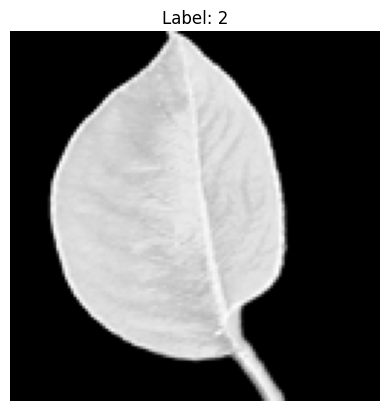

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load CSV
df = pd.read_csv("flower-data.csv")

# Pick an image (e.g., row 0)
row = df.iloc[16]
label = row["label"]
pixels = row.drop("label").values.reshape(128, 128)

# Display
plt.imshow(pixels, cmap="gray")
plt.title(f"Label: {label}")
plt.axis("off")
plt.show()

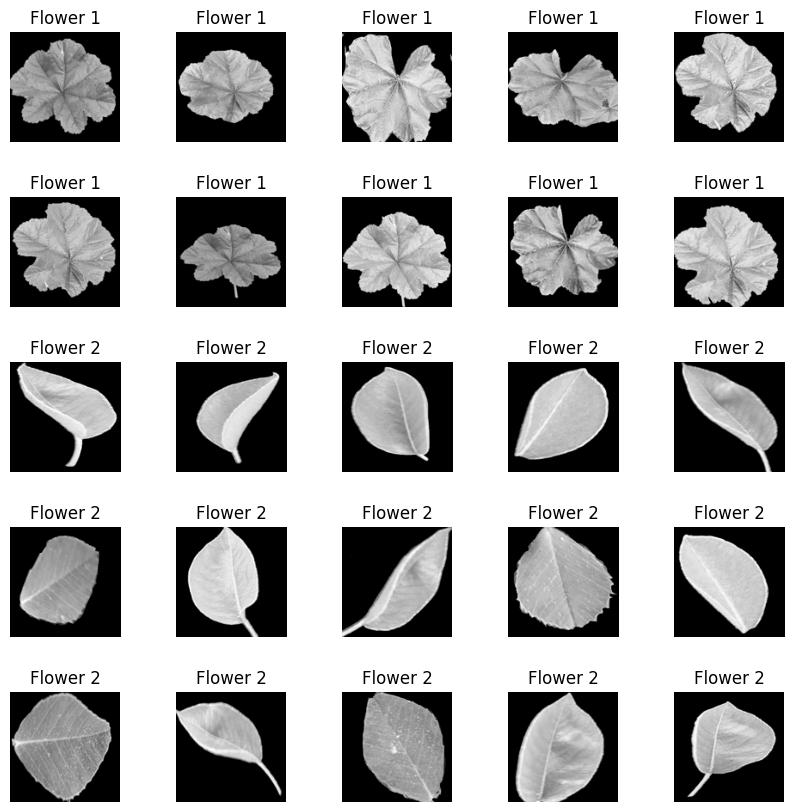

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import math

# Load the flower image data
data = pd.read_csv("flower-data.csv")

# Number of images to display
numbers_to_display = 25

# Grid size
num_cells = math.ceil(math.sqrt(numbers_to_display))

# Prepare the figure
plt.figure(figsize=(10, 10))

# Loop through the first `numbers_to_display` images
for plot_index in range(numbers_to_display):
    # Get the row (label + pixel values)
    flower = data.iloc[plot_index]
    flower_label = flower["label"]
    flower_pixels = flower.drop("label").values

    # Reshape to 128x128 image
    image_size = int(math.sqrt(flower_pixels.shape[0]))
    frame = flower_pixels.reshape((image_size, image_size))

    # Plot
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(frame, cmap="gray")
    plt.title(f"Flower {int(flower_label)}")
    plt.axis("off")

# Adjust spacing
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()


In [9]:

# Load your flower image data
data = pd.read_csv('flower-data.csv')  # make sure this CSV file exists

# 1. Split data: 90% for training, 10% for testing
pd_train_data = data.sample(frac=0.8, random_state=42)  # 90% training data
pd_test_data = data.drop(pd_train_data.index)           # remaining 10% as testing data




In [16]:
# 2. Convert training and testing data to NumPy arrays
train_data = pd_train_data.values
test_data = pd_test_data.values

In [17]:
# 3. Extract features and labels

# For training
x_train = train_data[:, 1:]     # all pixel columns
y_train = train_data[:, [0]]    # label column

# For testing
x_test = test_data[:, 1:]
y_test = test_data[:, [0]]


In [18]:
y_train -= 1
y_test -= 1

In [19]:

# Optional: print the shapes to verify
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (42, 16384)
y_train shape: (42, 1)
x_test shape: (11, 16384)
y_test shape: (11, 1)


In [20]:
# To make debugging of multilayer_perceptron module easier we enable imported modules autoreloading feature.
# By doing this you may change the code of multilayer_perceptron library and all these changes will be available here.
%load_ext autoreload
%autoreload 2

# Add project root folder to module loading paths.
import sys
sys.path.append('../..')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math

# Import custom multilayer perceptron implementation.
from homemade.neural_network import MultilayerPerceptron

In [22]:
# Define network configuration
layers = [
    16384,  # Input layer: 128x128 pixels
    512,    # Hidden Layer 1
    128,    # Hidden Layer 2
    32,     # Hidden Layer 3
    5       # Output layer: 5 classes
]
*
# Training parameters
normalize_data = True
epsilon = 0.12
max_iterations = 300
regularization_param = 1
alpha = 0.1

# Initialize and train neural network
multilayer_perceptron = MultilayerPerceptron(x_train, y_train, layers, epsilon, normalize_data)
(thetas, costs) = multilayer_perceptron.train(regularization_param, max_iterations, alpha)

# Plot training cost over iterations
plt.plot(range(len(costs)), costs)
plt.xlabel('Gradient Steps')
plt.ylabel('Cost')
plt.title('Training Loss over Time')
plt.show()

KeyboardInterrupt: 

In [53]:
# Run prediction on test data
predictions = multilayer_perceptron.predict(x_test)

# If your labels are one-hot encoded, convert both predictions and true labels to class indices
import numpy as np

if y_test.ndim > 1 and y_test.shape[1] > 1:
    y_test_classes = np.argmax(y_test, axis=1)
    predictions_classes = np.argmax(predictions, axis=1)
else:
    y_test_classes = y_test
    predictions_classes = predictions.flatten()

# Calculate accuracy
accuracy = np.mean(predictions_classes == y_test_classes) * 100
print(f"Test Accuracy: {accuracy:.2f}%")

Test 

In [54]:
for i in range(5):
    print(f"Test Sample {i+1}: Predicted = {predictions_classes[i]}, Actual = {y_test_classes[i]}")


Test Sample 1: Predicted = 0, Actual = [0]
Test Sample 2: Predicted = 0, Actual = [0]
Test Sample 3: Predicted = 0, Actual = [2]
Test Sample 4: Predicted = 0, Actual = [2]
Test Sample 5: Predicted = 3, Actual = [3]


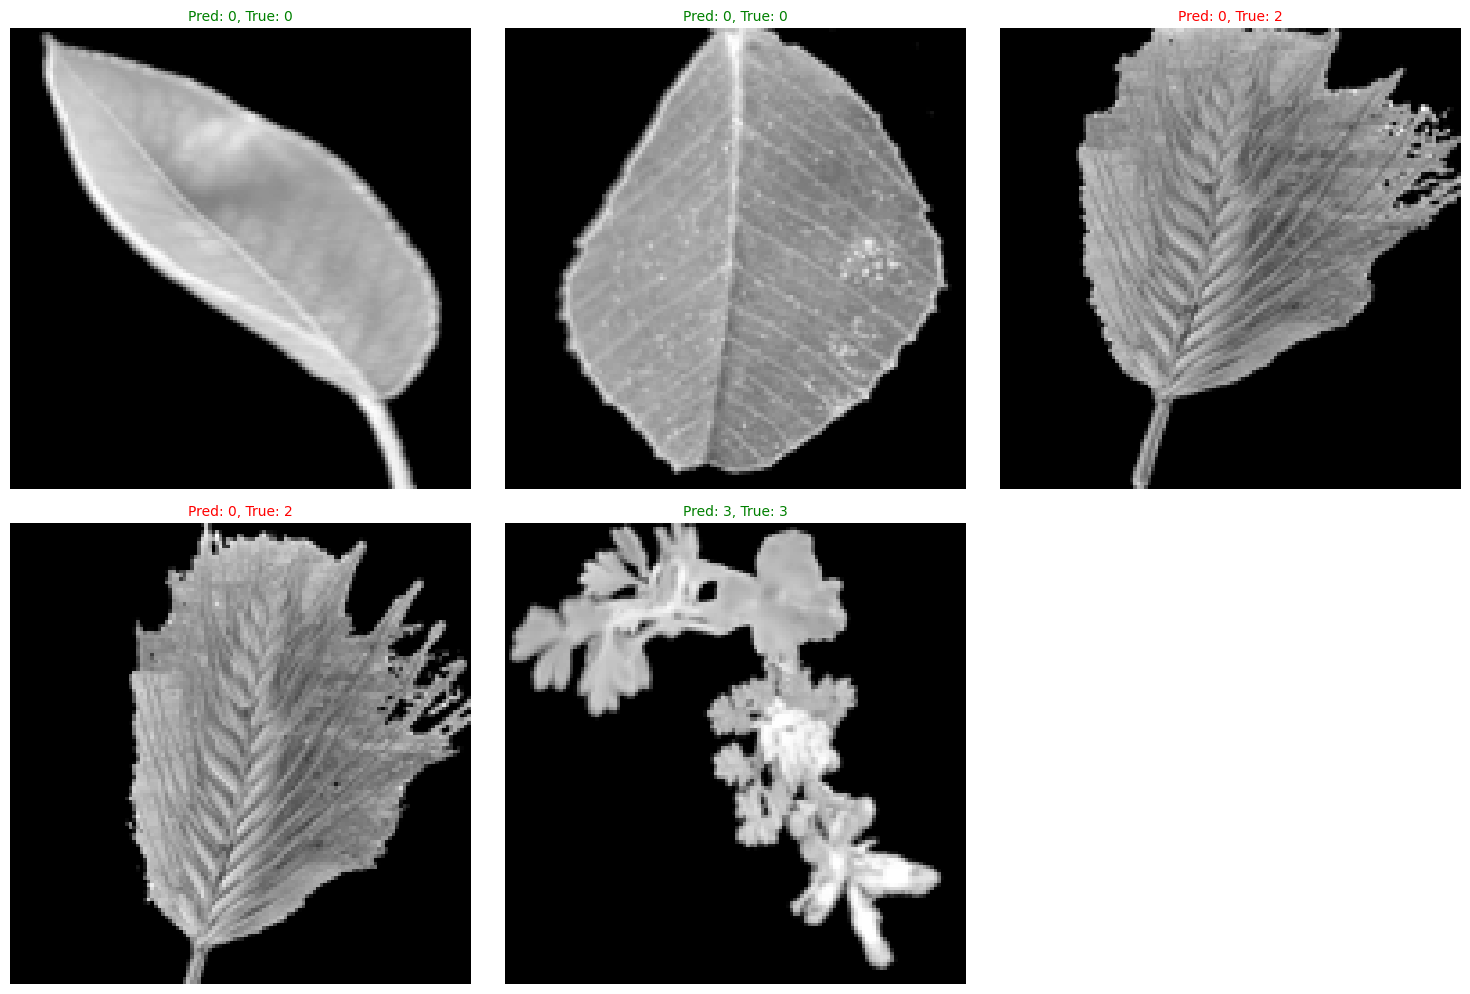

In [55]:
import math
import matplotlib.pyplot as plt
import numpy as np

# Predict using the trained model
predictions = multilayer_perceptron.predict(x_test)

# Convert predictions and true labels to class indices
if y_test.ndim > 1 and y_test.shape[1] > 1:
    y_test_classes = np.argmax(y_test, axis=1)
    predictions_classes = np.argmax(predictions, axis=1)
else:
    y_test_classes = y_test.flatten()
    predictions_classes = predictions.flatten()

# How many images to display (limited to available test samples)
num_images = min(25, x_test.shape[0])
grid_size = math.ceil(math.sqrt(num_images))

# Plot the test images with predictions
plt.figure(figsize=(15, 15))
for i in range(num_images):
    image = x_test[i].reshape(128, 128)
    actual = y_test_classes[i]
    predicted = predictions_classes[i]

    plt.subplot(grid_size, grid_size, i + 1)
    plt.imshow(image, cmap='gray')
    
    color = 'green' if actual == predicted else 'red'
    plt.title(f"Pred: {predicted}, True: {actual}", color=color, fontsize=10)
    
    plt.axis('off')

plt.tight_layout()
plt.show()


In [56]:
x_all = np.concatenate((x_train, x_test), axis=0)
y_all = np.concatenate((y_train, y_test), axis=0)


In [57]:
import numpy as np

# Combine train and test inputs
x_all = np.concatenate((x_train, x_test), axis=0)

# Combine train and test labels
y_all = np.concatenate((y_train, y_test), axis=0)



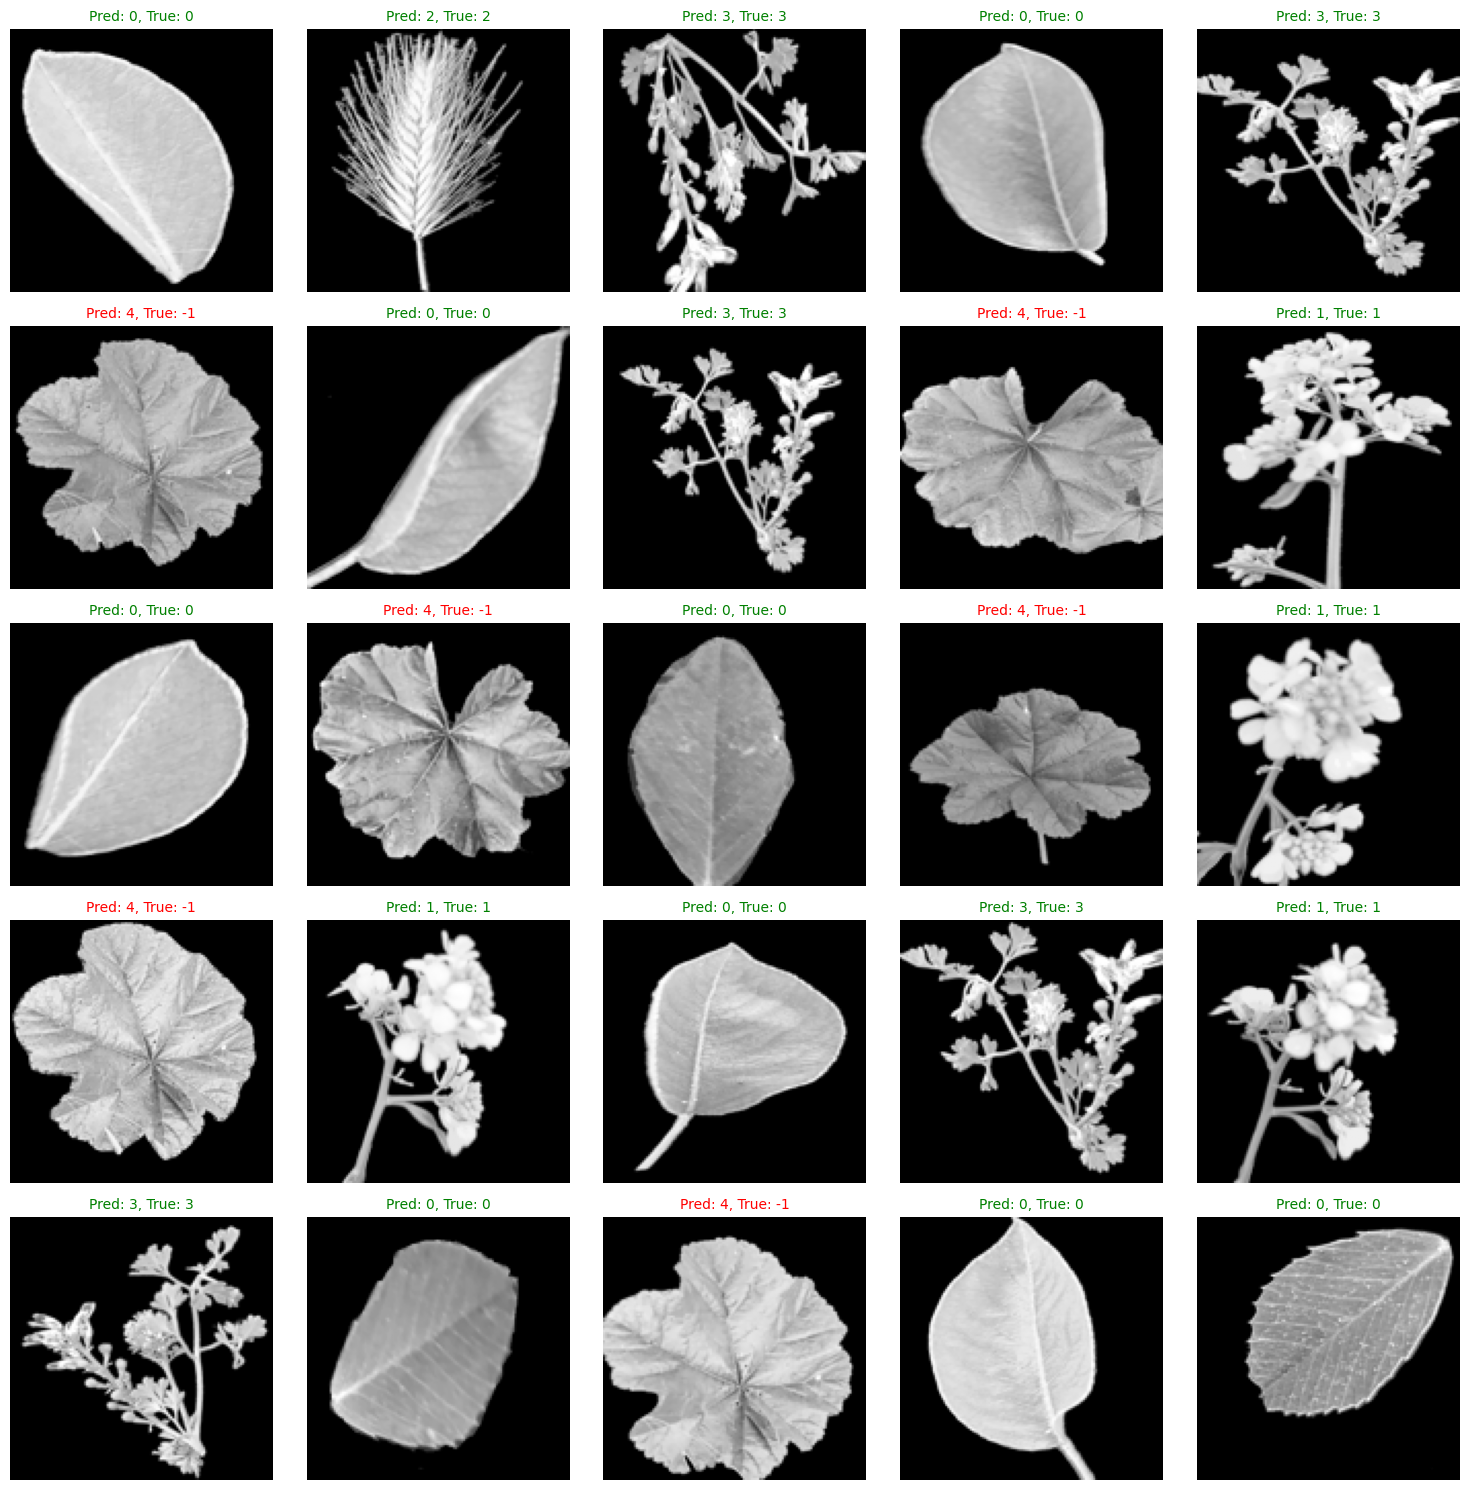

In [58]:
predictions_all = multilayer_perceptron.predict(x_all)

if y_all.ndim > 1 and y_all.shape[1] > 1:
    y_all_classes = np.argmax(y_all, axis=1)
    predictions_all_classes = np.argmax(predictions_all, axis=1)
else:
    y_all_classes = y_all.flatten()
    predictions_all_classes = predictions_all.flatten()

num_images = min(25, x_all.shape[0])
grid_size = int(np.ceil(np.sqrt(num_images)))

plt.figure(figsize=(15, 15))
for i in range(num_images):
    image = x_all[i].reshape(128, 128)
    actual = y_all_classes[i]
    predicted = predictions_all_classes[i]

    plt.subplot(grid_size, grid_size, i + 1)
    plt.imshow(image, cmap='gray')

    color = 'green' if actual == predicted else 'red'
    plt.title(f"Pred: {predicted}, True: {actual}", color=color, fontsize=10)

    plt.axis('off')

plt.tight_layout()
plt.show()
